In [1]:
import string
lineList = ["CONECT 3341   12    3  1223", "CONECT    3    5    1   34"]
list = [3,2]

for line in lineList:
    valid = True
    split = string.split(line)
    if int(split[1]) in list:
        valid = False
    if valid:
        for item in split:
            if item != "CONECT" and int(item) in list:
                split.remove(item)
        
        newLine = ""
        for item in split:
            newLine = newLine + "%5s" % item
            
        print newLine

CONECT 3341   12 1223


In [ ]:
import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

CNN0 = []
logitCNN0 = []
Vina0 = []
fileIn = open('CNN_vs_Vina_0_paired.dat', 'r')
plt.figure(figsize=(20,20))

for line in fileIn:
    split = string.split(line)
    CNN0.append(float(split[0]))
    logitCNN0.append(logit(float(split[0])))
    Vina0.append(float(split[1]))
    
    
plt.scatter(logitCNN0, Vina0, alpha=0.5, s= 100, color = 'purple', marker = '^', label = 'Model 0')

CNN1 = []
logitCNN1 = []
Vina1 = []
fileIn = open('CNN_vs_Vina_1_paired.dat', 'r')

for line in fileIn:
    split = string.split(line)
    CNN1.append(float(split[0]))
    logitCNN1.append(logit(float(split[0])))
    Vina1.append(float(split[1]))
    
    
plt.scatter(logitCNN1, Vina1, color = "teal", alpha=0.5, s=100, marker = 's', label = 'Model 1')

CNN2 = []
logitCNN2 = []
Vina2 = []
fileIn = open('CNN_vs_Vina_2_paired.dat', 'r')

for line in fileIn:
    split = string.split(line)
    CNN2.append(float(split[0]))
    logitCNN2.append(logit(float(split[0])))
    Vina2.append(float(split[1]))
    
    
plt.scatter(logitCNN2, Vina2, color = "blue", alpha=0.5, s = 100, label = 'Model 2')

plt.legend(fontsize = 40)
plt.xlabel('logit(CNN Score)', fontsize = 40)
plt.ylabel('Vina Score', fontsize = 40)


In [ ]:
import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

CNN0 = []
logitCNN0 = []
RMSD0 = []
fileIn = open('CNN_vs_RMSD_0_paired.dat', 'r')
plt.figure(figsize=(20,20))

for line in fileIn:
    split = string.split(line)
    CNN0.append(float(split[0]))
    logitCNN0.append(logit(float(split[0])))
    RMSD0.append(float(split[1]))
    
    
plt.scatter(logitCNN0, RMSD0, alpha=0.5, s= 100, color = 'indianred', marker = '^', label = 'Model 0')

CNN1 = []
logitCNN1 = []
RMSD1 = []
fileIn = open('CNN_vs_RMSD_1_paired.dat', 'r')

for line in fileIn:
    split = string.split(line)
    CNN1.append(float(split[0]))
    logitCNN1.append(logit(float(split[0])))
    RMSD1.append(float(split[1]))
    
plt.scatter(logitCNN1, RMSD1, color = "orange", alpha=0.5, s=100, marker = 's', label = 'Model 1')

CNN2 = []
logitCNN2 = []
RMSD2 = []
fileIn = open('CNN_vs_RMSD_2_paired.dat', 'r')

for line in fileIn:
    split = string.split(line)
    CNN2.append(float(split[0]))
    logitCNN2.append(logit(float(split[0])))
    RMSD2.append(float(split[1]))
    
    
plt.scatter(logitCNN2, RMSD2, color = "red", alpha=0.5, s = 100, label = 'Model 2')

plt.legend(fontsize = 40)
plt.xlabel('logit(CNN Score)', fontsize = 40)
plt.ylabel('RMSD', fontsize = 40)


580


(-15, 15)

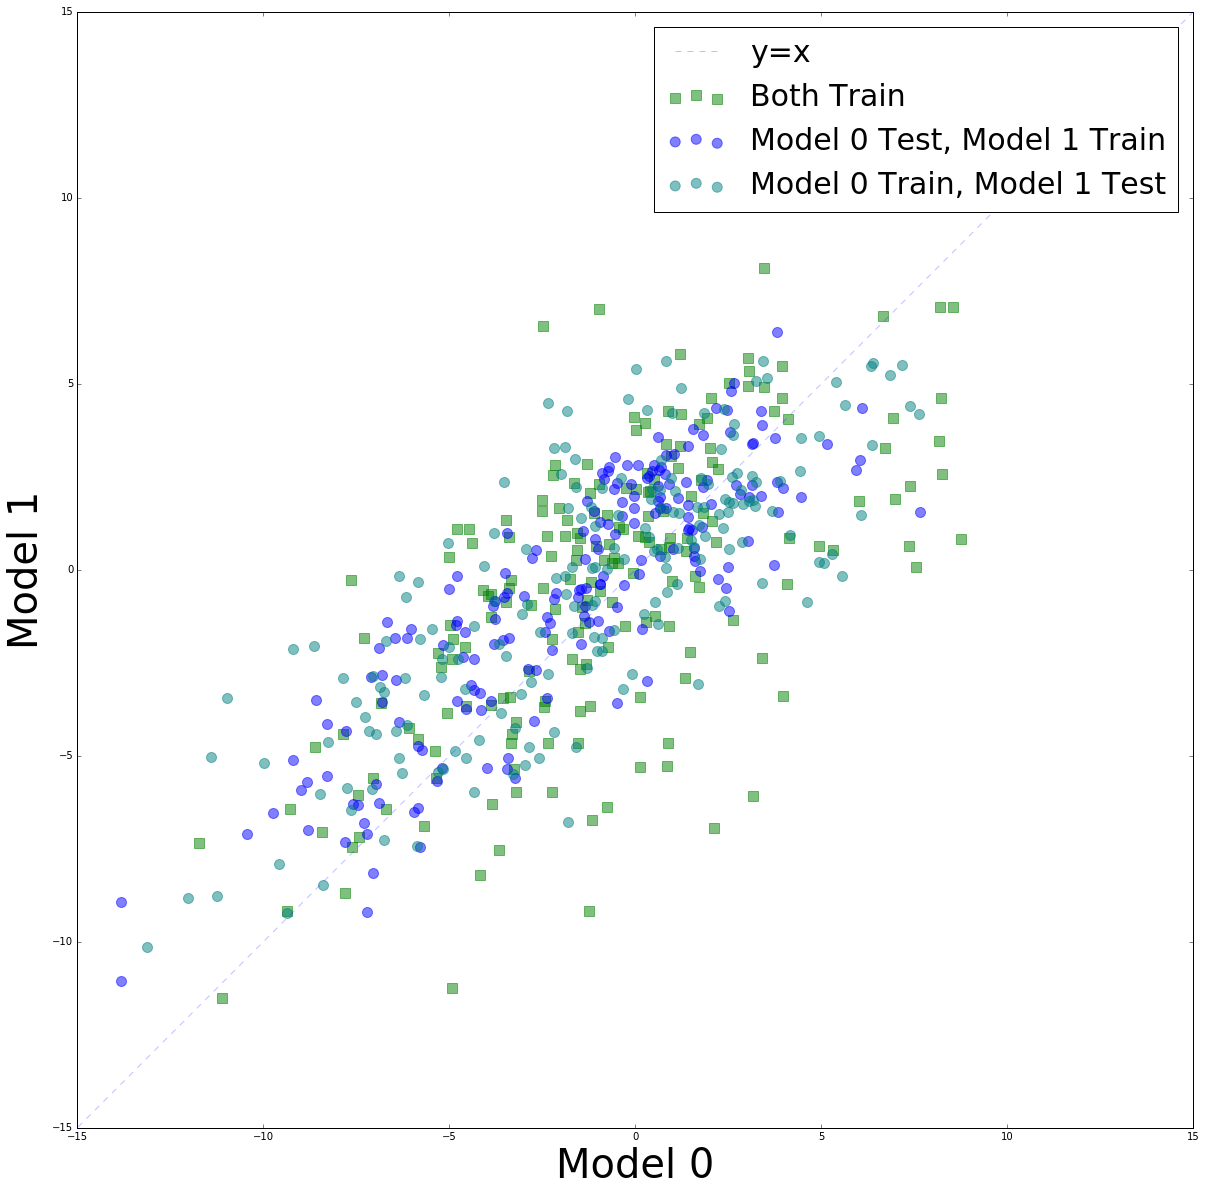

In [114]:

import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

bothTest = []
bothTrain = []
TrainTest = []
TestTrain = []

logitBothTest = []
logitBothTrain = []
logitTrainTest = []
logitTestTrain = []

fileIn = open('scored_models_sorted.dat', 'r')


for line in fileIn:
    
    model0Value = float(split[6])
    model1Value = float(split[7])
    
    inModelXTest = split[9]
    inModelYTest = split[10]
    
    pair = (model0Value, model1Value)
    logitPair = (logit(model0Value), logit(model1Value))
    
    split = string.split(line)
    
    if inModelXTest == '0' and inModelYTest == '0':
        
        bothTrain.append(pair)
        logitBothTrain.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '1':
        
        bothTest.append(pair)
        logitBothTest.append(logitPair)
        
    elif inModelXTest == '0' and inModelYTest == '1':
        
        TrainTest.append(pair)
        logitTrainTest.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '0':
        
        TestTrain.append(pair)
        logitTestTrain.append(logitPair)



print len(bothTest) + len(bothTrain) + len(TrainTest) + len(TestTrain)

plt.figure(figsize=(20,20))


x = []
y = []

for pair in logitBothTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "green", s=100, label = "Both Train", marker = "s", alpha = 0.5)

x = []
y = []

for pair in logitBothTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "red", s=100, alpha = 0.5, marker = "^")

x = []
y = []

for pair in logitTestTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "blue", s=100, label = "Model 0 Test, Model 1 Train", alpha = 0.5)

x = []
y = []

for pair in logitTrainTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "teal", s=100, label = 'Model 0 Train, Model 1 Test', alpha = 0.5)

x = [-20,20]
y = [-20,20]
plt.plot(x,y, '--', alpha = 0.25, label = "y=x")

plt.legend(fontsize = 30)
plt.xlabel('Model 0', fontsize = 40)
plt.ylabel('Model 1', fontsize = 40)
plt.xlim(-15, 15)
plt.ylim(-15, 15)



580


(-15, 15)

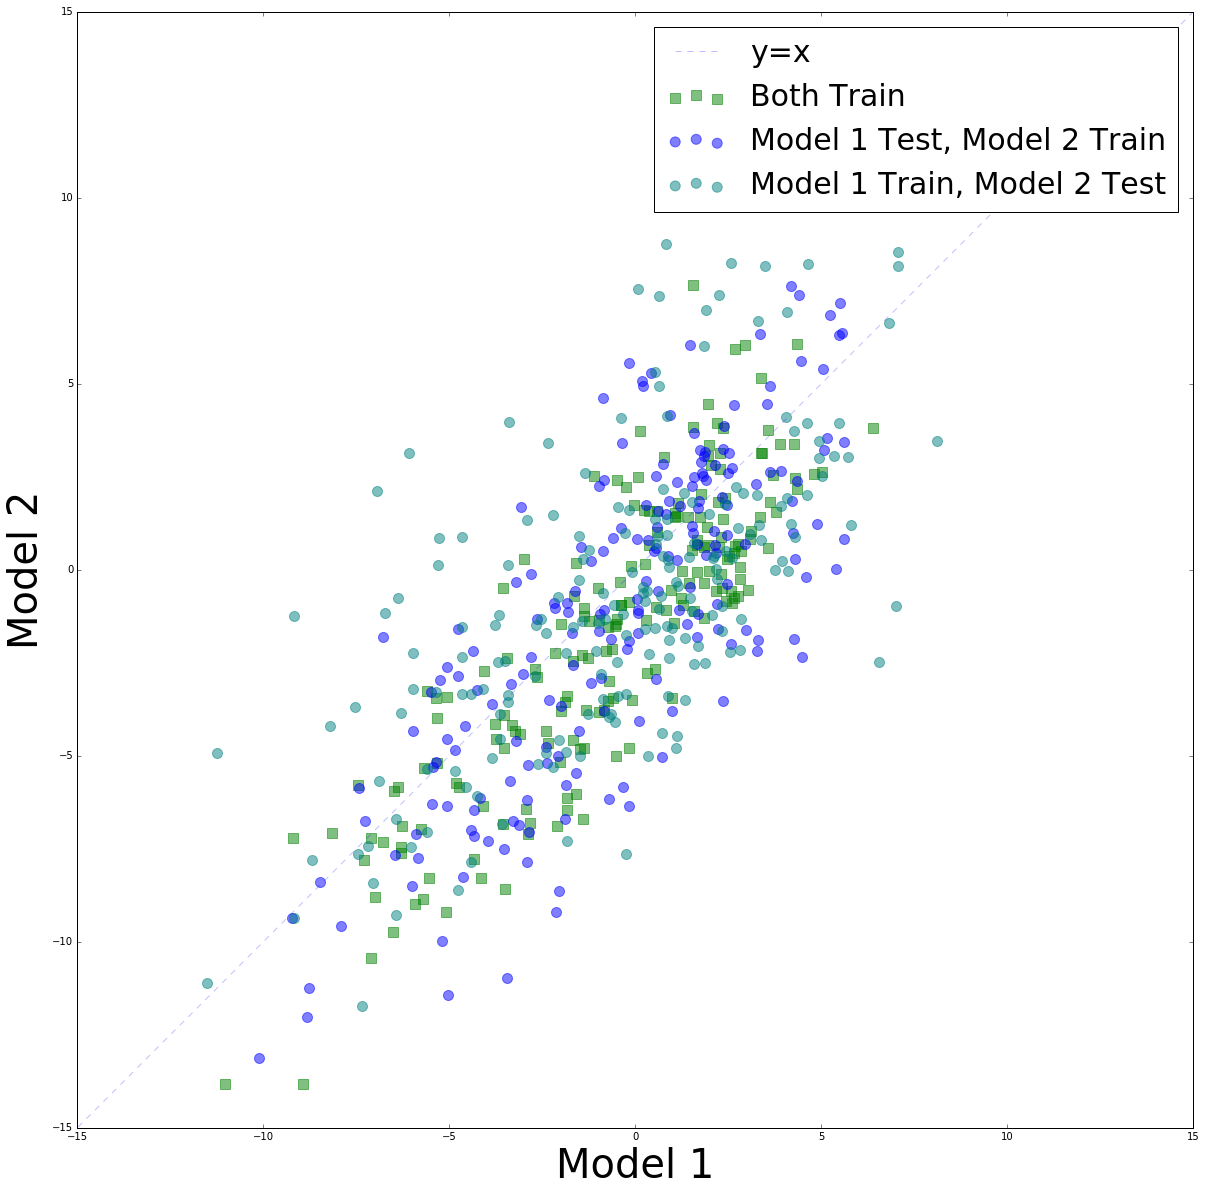

In [116]:

import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

bothTest = []
bothTrain = []
TrainTest = []
TestTrain = []

logitBothTest = []
logitBothTrain = []
logitTrainTest = []
logitTestTrain = []

fileIn = open('scored_models_sorted.dat', 'r')


for line in fileIn:
    
    model0Value = float(split[7])
    model1Value = float(split[8])
    
    inModelXTest = split[10]
    inModelYTest = split[11]
    
    pair = (model0Value, model1Value)
    logitPair = (logit(model0Value), logit(model1Value))
    
    split = string.split(line)
    
    if inModelXTest == '0' and inModelYTest == '0':
        
        bothTrain.append(pair)
        logitBothTrain.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '1':
        
        bothTest.append(pair)
        logitBothTest.append(logitPair)
        
    elif inModelXTest == '0' and inModelYTest == '1':
        
        TrainTest.append(pair)
        logitTrainTest.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '0':
        
        TestTrain.append(pair)
        logitTestTrain.append(logitPair)



print len(bothTest) + len(bothTrain) + len(TrainTest) + len(TestTrain)

plt.figure(figsize=(20,20))


x = []
y = []

for pair in logitBothTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "green", s=100, label = "Both Train", marker = "s", alpha = 0.5)

x = []
y = []

for pair in logitBothTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "red", s=100, alpha = 0.5, marker = "^")

x = []
y = []

for pair in logitTestTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "blue", s=100, label = "Model 1 Test, Model 2 Train", alpha = 0.5)

x = []
y = []

for pair in logitTrainTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "teal", s=100, label = 'Model 1 Train, Model 2 Test', alpha = 0.5)

x = [-20,20]
y = [-20,20]
plt.plot(x,y, '--', alpha = 0.25, label = "y=x")

plt.legend(fontsize = 30)
plt.xlabel('Model 1', fontsize = 40)
plt.ylabel('Model 2', fontsize = 40)
plt.xlim(-15, 15)
plt.ylim(-15, 15)

580


(-15, 15)

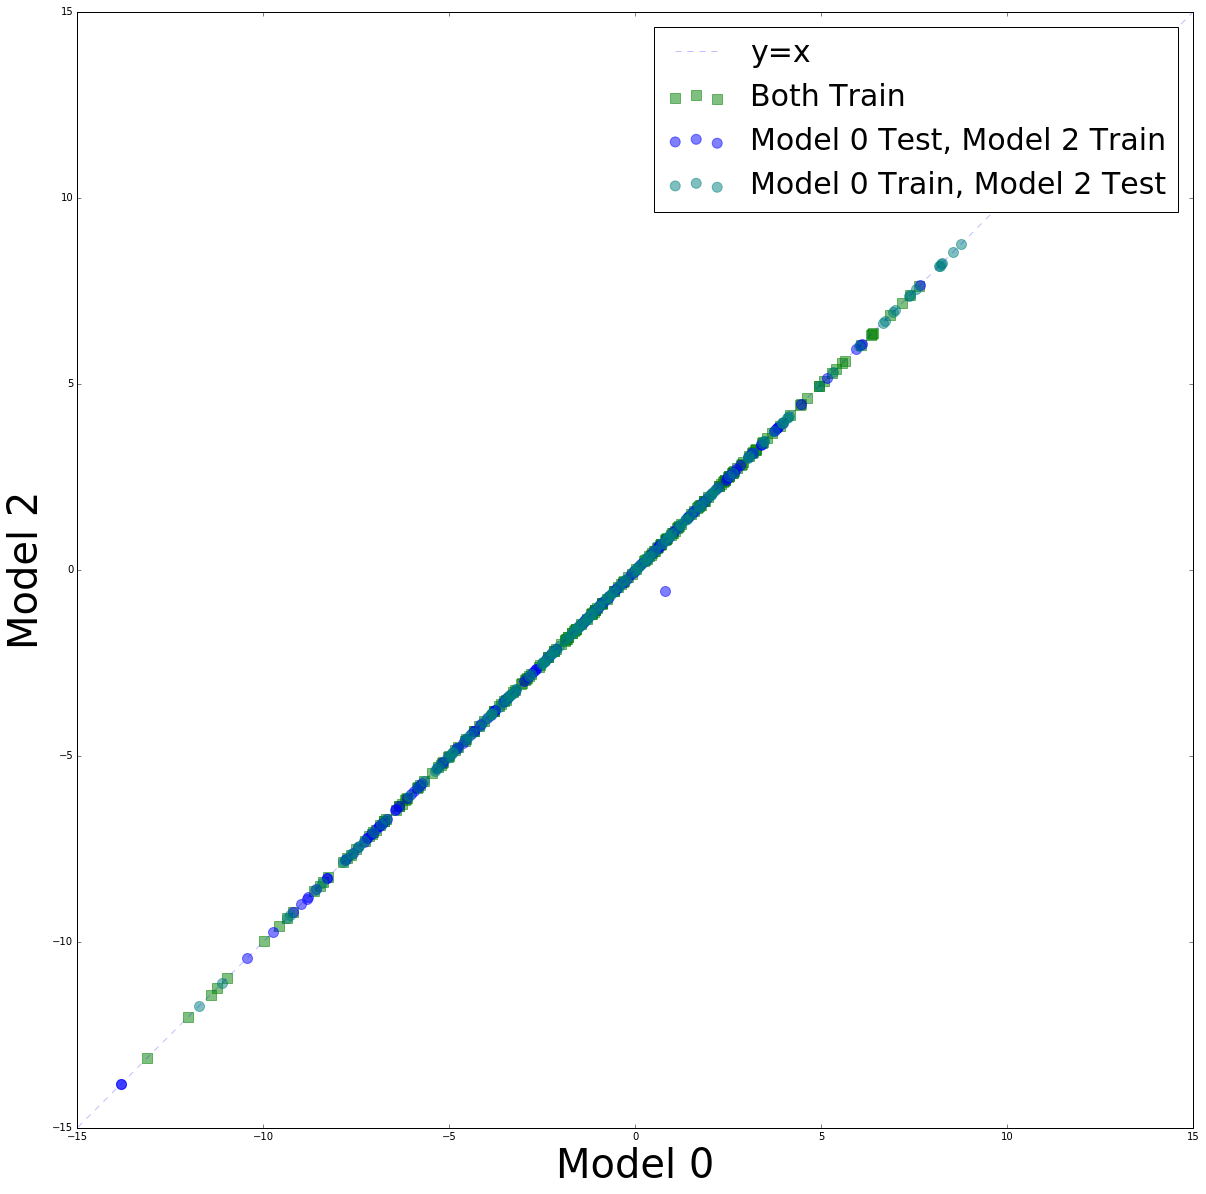

In [118]:

import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

bothTest = []
bothTrain = []
TrainTest = []
TestTrain = []

logitBothTest = []
logitBothTrain = []
logitTrainTest = []
logitTestTrain = []

fileIn = open('scored_models_sorted.dat', 'r')


for line in fileIn:
    
    model0Value = float(split[6])
    model1Value = float(split[8])
    
    inModelXTest = split[9]
    inModelYTest = split[11]
    
    pair = (model0Value, model1Value)
    logitPair = (logit(model0Value), logit(model1Value))
    
    split = string.split(line)
    
    if inModelXTest == '0' and inModelYTest == '0':
        
        bothTrain.append(pair)
        logitBothTrain.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '1':
        
        bothTest.append(pair)
        logitBothTest.append(logitPair)
        
    elif inModelXTest == '0' and inModelYTest == '1':
        
        TrainTest.append(pair)
        logitTrainTest.append(logitPair)
        
    elif inModelXTest == '1' and inModelYTest == '0':
        
        TestTrain.append(pair)
        logitTestTrain.append(logitPair)



print len(bothTest) + len(bothTrain) + len(TrainTest) + len(TestTrain)

plt.figure(figsize=(20,20))


x = []
y = []

for pair in logitBothTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "green", s=100, label = "Both Train", marker = "s", alpha = 0.5)

x = []
y = []

for pair in logitBothTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "red", s=100, alpha = 0.5, marker = "^")

x = []
y = []

for pair in logitTestTrain:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "blue", s=100, label = "Model 0 Test, Model 2 Train", alpha = 0.5)

x = []
y = []

for pair in logitTrainTest:
    x.append(pair[0])
    y.append(pair[1])
plt.scatter(x,y, color = "teal", s=100, label = 'Model 0 Train, Model 2 Test', alpha = 0.5)

x = [-20,20]
y = [-20,20]
plt.plot(x,y, '--', alpha = 0.25, label = "y=x")

plt.legend(fontsize = 30)
plt.xlabel('Model 0', fontsize = 40)
plt.ylabel('Model 2', fontsize = 40)
plt.xlim(-15, 15)
plt.ylim(-15, 15)

